In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import gmean

In [2]:
df = pd.read_csv('bangladesh_data.csv')
df.head()

,Year,Literacy Rate(%),Population,Population growth rate (%),Migrant Population (Estimated),Net Migration Rate,Growth Rate,Inflation Rate (%),Annual Change (%),GNI (Billion USD),...,Military Size,Annual % Change\r,Suicide Rate,Suicide Rate - Male,Suicide Rate - Female,Education Spending (% of GDP),Annual Change.9,Arable Land -Hectares,Per Capita,Percent
0,1980.0,26.0,"83,929,765",2.47%,"720,000",-2.569,-8.38%,0.82,-0.82,18.48,...,NaN,NaN,NaN,NaN,NaN,5.26%,1.37%,"9,121,000",11.00%,70.07%
1,1981.0,27.0,"86,154,836",2.65%,"730,000",-2.333,-9.19%,7.23,6.41,21.50,...,NaN,NaN,NaN,NaN,NaN,6.63%,1.37%,"9,109,000",11.00%,69.98%
2,1982.0,27.8,"88,555,336",2.79%,"740,000",-2.098,-10.07%,2.13,-5.1,20.91,...,NaN,NaN,NaN,NaN,NaN,6.39%,-0.24%,"9,104,000",10.00%,69.94%
3,1983.0,28.2,"91,045,478",2.81%,"750,000",-1.863,-11.20%,3.88,1.75,19.63,...,NaN,NaN,NaN,NaN,NaN,6.47%,0.08%,"9,089,000",10.00%,69.82%
4,1984.0,28.8,"93,534,239",2.73%,"760,000",-1.581,-15.14%,4.8,0.92,19.39,...,NaN,NaN,NaN,NaN,NaN,8.09%,1.61%,"9,185,000",10.00%,70.56%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Columns: 118 entries, Year to Percent
dtypes: float64(26), object(92)
memory usage: 93.2+ KB


In [4]:
df.columns[df.columns.get_loc('GNI (Billion USD)')+1:df.columns.get_loc('Military Size ')]

Index(['Growth Rate (%)', 'GNP (Billion USD)', 'Growth Rate (%).1',
       'Bangladesh Economic Growth GDP (Billion USD)', 'GDP', 'GDP Per Capita',
       'Growth Rate (%).2', 'Export ', 'Export Growth(%GDP)', 'Import ',
       'Import Growth(%GDP)', 'Billions of US $', '% of GDP',
       'Poverty Rate (National)', 'Rural Poverty Rate', 'Urban Poverty Rate',
       'Number of Private Vehichles', 'Death Rate', 'Death Growth Rate',
       'Birth Rate', 'Growth Rate.1', 'Infant Mortality Rate', 'Growth Rate.2',
       'Unemployment Rate (%)', 'Annual Change (%).1',
       'Youth Unemployment Rate', 'Annual Change',
       'Labor Force Participation Rate', 'Annual Change.1',
       'Life Expectancy (years)', 'Life Expectancy Growth Rate (%)',
       'Urban Population', 'Urban Population % of Total',
       'Urban Population Change (%)', 'Rural Population', '% of Total(rural)',
       'Change(rural)', 'Crime Rate (Per 100K Population)',
       'Annual % Crime Rate Change', ' Murder/Homicide

In [5]:
df = df.dropna(subset='Year', axis=0)
df.head()

,Year,Literacy Rate(%),Population,Population growth rate (%),Migrant Population (Estimated),Net Migration Rate,Growth Rate,Inflation Rate (%),Annual Change (%),GNI (Billion USD),...,Military Size,Annual % Change\r,Suicide Rate,Suicide Rate - Male,Suicide Rate - Female,Education Spending (% of GDP),Annual Change.9,Arable Land -Hectares,Per Capita,Percent
0,1980.0,26.0,"83,929,765",2.47%,"720,000",-2.569,-8.38%,0.82,-0.82,18.48,...,NaN,NaN,NaN,NaN,NaN,5.26%,1.37%,"9,121,000",11.00%,70.07%
1,1981.0,27.0,"86,154,836",2.65%,"730,000",-2.333,-9.19%,7.23,6.41,21.50,...,NaN,NaN,NaN,NaN,NaN,6.63%,1.37%,"9,109,000",11.00%,69.98%
2,1982.0,27.8,"88,555,336",2.79%,"740,000",-2.098,-10.07%,2.13,-5.1,20.91,...,NaN,NaN,NaN,NaN,NaN,6.39%,-0.24%,"9,104,000",10.00%,69.94%
3,1983.0,28.2,"91,045,478",2.81%,"750,000",-1.863,-11.20%,3.88,1.75,19.63,...,NaN,NaN,NaN,NaN,NaN,6.47%,0.08%,"9,089,000",10.00%,69.82%
4,1984.0,28.8,"93,534,239",2.73%,"760,000",-1.581,-15.14%,4.8,0.92,19.39,...,NaN,NaN,NaN,NaN,NaN,8.09%,1.61%,"9,185,000",10.00%,70.56%


In [6]:
def convert_to_float(col):
    df[col] = df[col].str.strip('%').astype(float)
    return df[col]

In [ ]:
df['Population growth rate (%)'] = convert_to_float('Population growth rate (%)')

# Graphs

### Literacy Rate

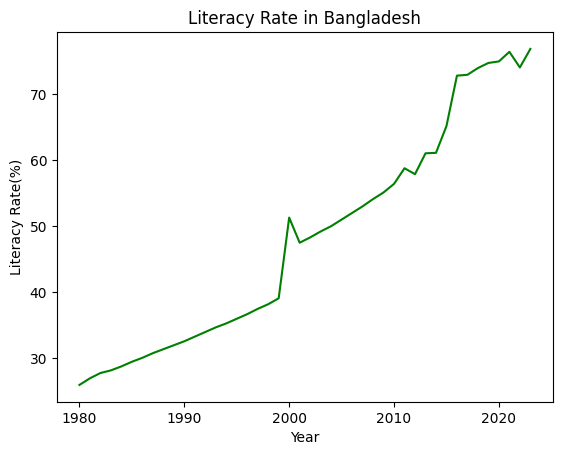

In [8]:
sns.lineplot(x='Year', y='Literacy Rate(%)', data=df, color='green')

plt.title('Literacy Rate in Bangladesh')
plt.show()

### GDP

In [9]:
df['GDP (in billions)'] = df['GDP'].str.translate(str.maketrans('', '', '$B')).astype(float)
df['GDP (in billions)'].head()

0    18.14
1    20.25
2    18.53
3    17.61
4    18.92
Name: GDP (in billions), dtype: float64

In [10]:
df['Education Spending (% of GDP)'] = convert_to_float('Education Spending (% of GDP)')

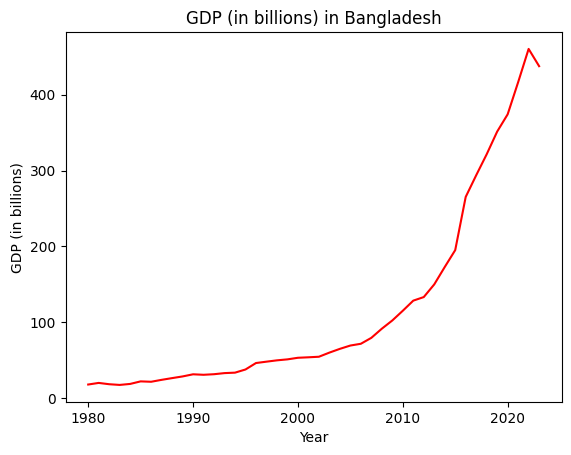

In [11]:
sns.lineplot(x='Year', y='GDP (in billions)', data=df, color='red')

plt.title('GDP (in billions) in Bangladesh')
plt.show()

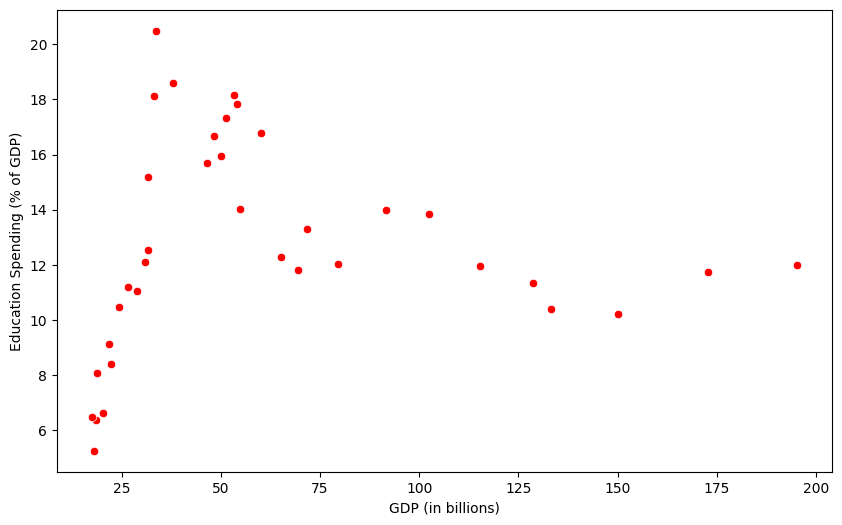

In [12]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='GDP (in billions)', y=df['Education Spending (% of GDP)'], data=df, color='red')
#plt.gca().invert_yaxis()
plt.show()

### Inflation

In [13]:
df['Inflation Rate (%)'] = df['Inflation Rate (%)'].str.strip('%').astype(float)
df['Inflation Rate (%)'].head()

0    0.82
1    7.23
2    2.13
3    3.88
4    4.80
Name: Inflation Rate (%), dtype: float64

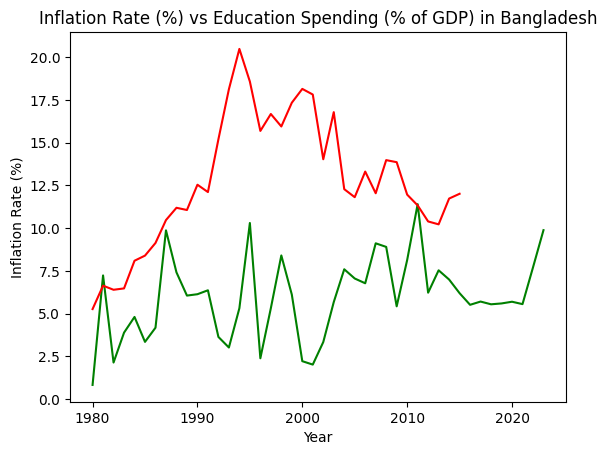

In [14]:
sns.lineplot(x='Year', y='Inflation Rate (%)', data=df, color='green')
sns.lineplot(x='Year', y='Education Spending (% of GDP)', data=df, color='red')

plt.title('Inflation Rate (%) vs Education Spending (% of GDP) in Bangladesh')
#plt.title('Inflation Rate in Bangladesh (%)')
plt.show()

### Labor Force Participation

In [ ]:
df['Labor Force Participation Rate'] = df['Labor Force Participation Rate'][11:].str.strip('%').astype(float)
df['Labor Force Participation Rate'].head()

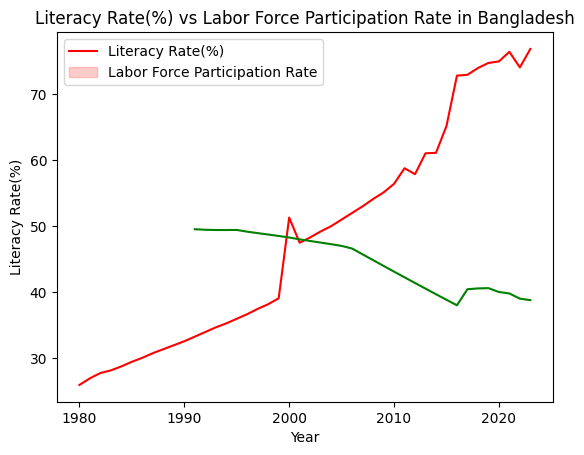

In [21]:
sns.lineplot(x='Year', y='Literacy Rate(%)', data=df, color='red')
sns.lineplot(x='Year', y='Labor Force Participation Rate', data=df, color='green')
plt.legend(['Literacy Rate(%)', 'Labor Force Participation Rate'])
plt.title('Literacy Rate(%) vs Labor Force Participation Rate in Bangladesh')
plt.show()


### Unemployment Rate

In [17]:
df['Unemployment Rate (%)'] = df['Unemployment Rate (%)'].str.strip('%').astype(float)

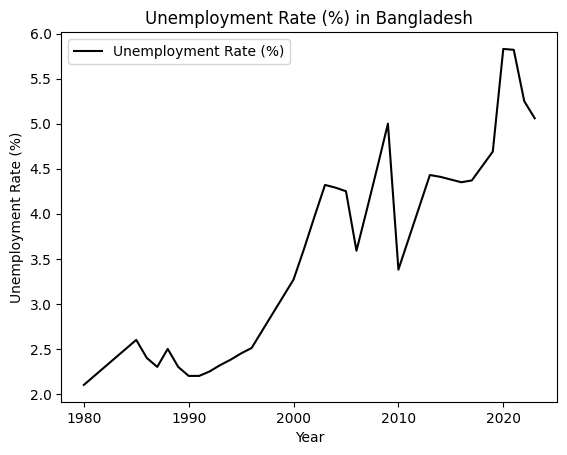

In [18]:
sns.lineplot(x='Year', y='Unemployment Rate (%)', data=df, color='black')

plt.title('Unemployment Rate (%) in Bangladesh')
plt.legend(['Unemployment Rate (%)'])

### GDP Per  Capita

In [30]:
df['GDP Per Capita'] = df['GDP Per Capita'].str.strip('$').str.replace(',','').astype(float)

<Axes: >

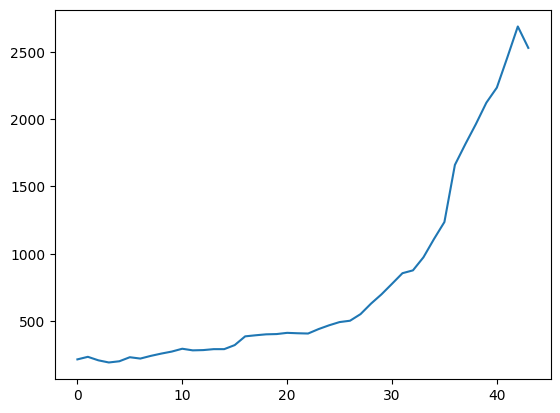

In [39]:
df['GDP Per Capita'].plot()

In [33]:
df['ln(GDP Per Capita)'] = np.log(df['GDP Per Capita'])

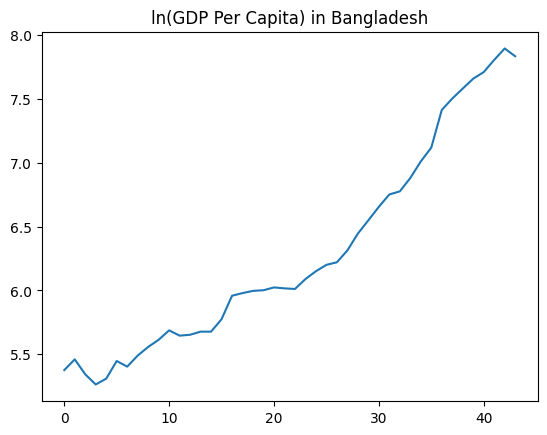

In [35]:
df['ln(GDP Per Capita)'].plot()
plt.title('ln(GDP Per Capita) in Bangladesh')
plt.show()

### Gini  Coefficient

Text(0.5, 1.0, 'Gini Coefficient in Bangladesh (Empirical Estimation)')

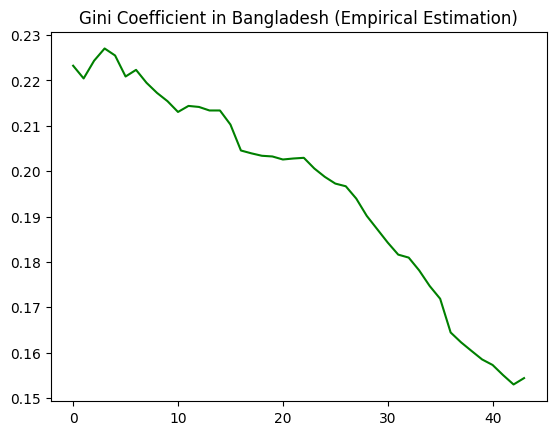

In [60]:
df['Gini Coefficient'] = 0.5 * (df['GDP Per Capita']**(-0.15))
df['Gini Coefficient'].plot(color='green')
plt.title('Gini Coefficient in Bangladesh (Empirical Estimation)')

In [55]:
df['Population'] = df['Population '].str.replace(',','').astype(float)

<Axes: xlabel='Population growth rate (%)', ylabel='Literacy Rate(%)'>

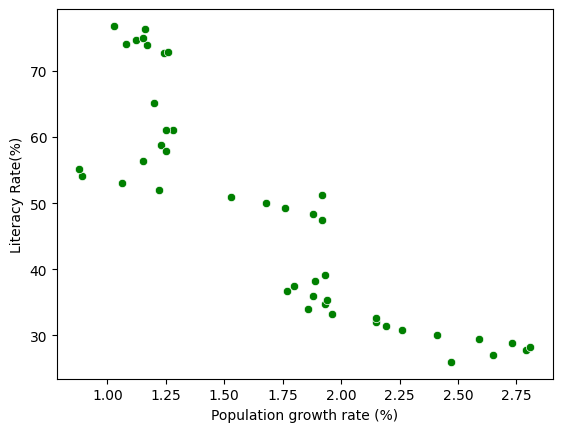

In [64]:
sns.scatterplot(x='Population growth rate (%)', y='Literacy Rate(%)', data=df, color='green')

<Axes: >

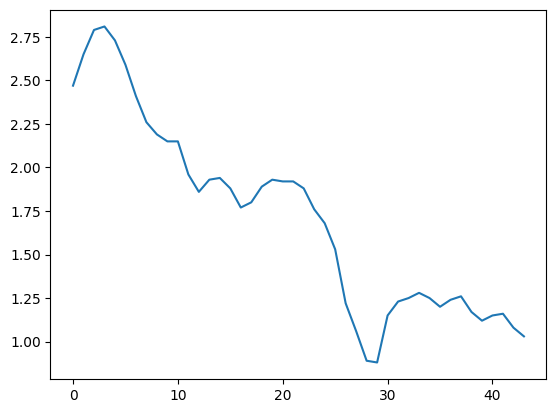

In [69]:
df['Population growth rate (%)'].plot()

In [74]:
df.columns.get_loc()

TypeError: Index.get_loc() missing 1 required positional argument: 'key'